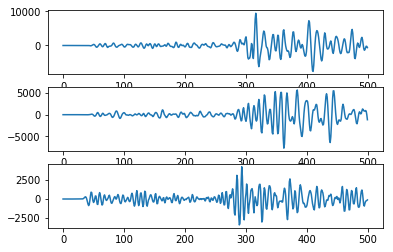

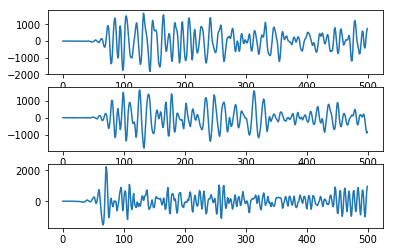

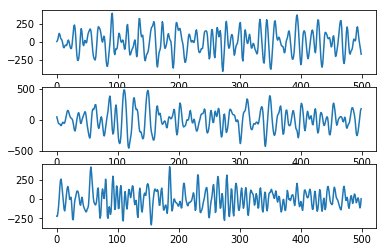

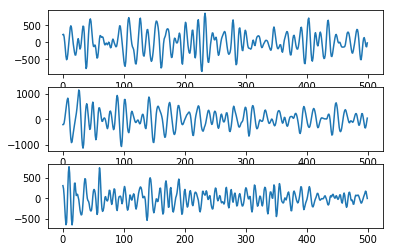

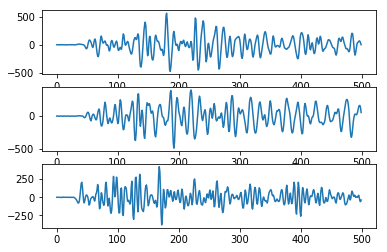

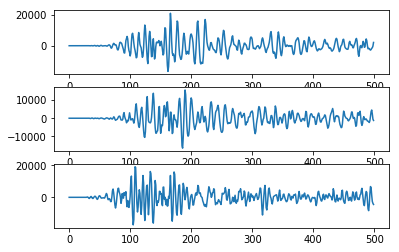

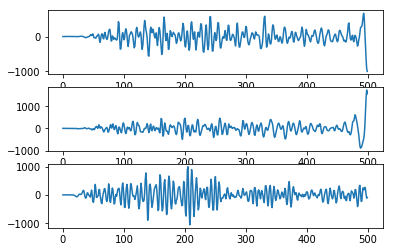

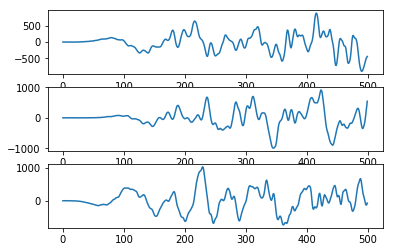

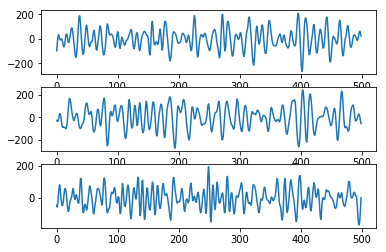

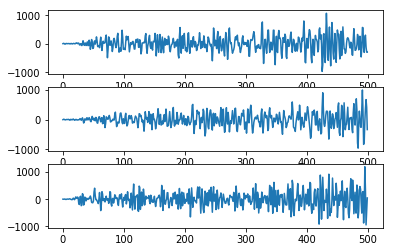

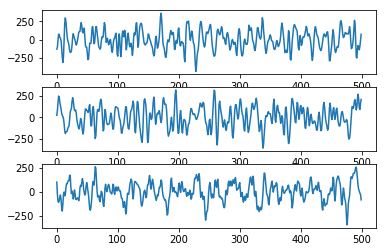

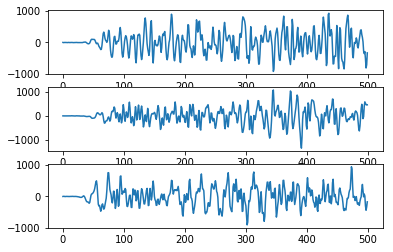

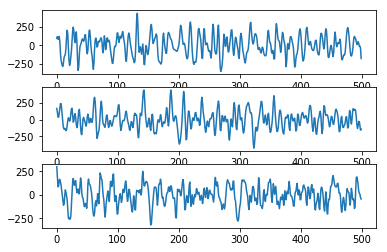

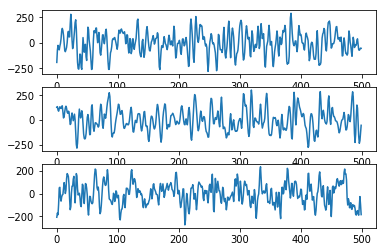

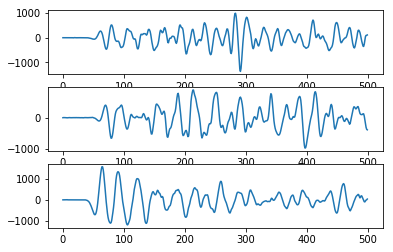

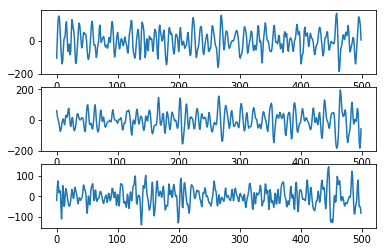

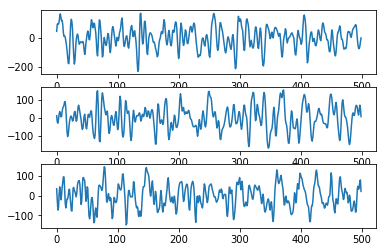

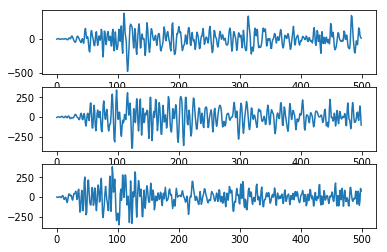

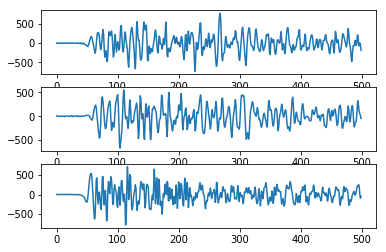

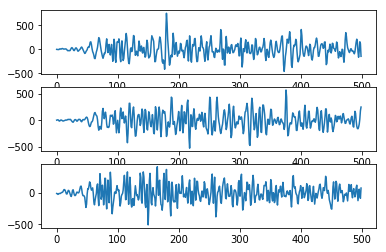

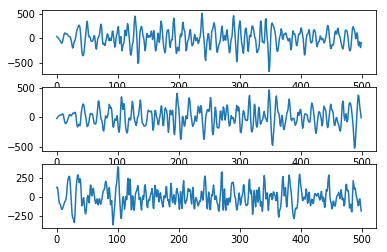

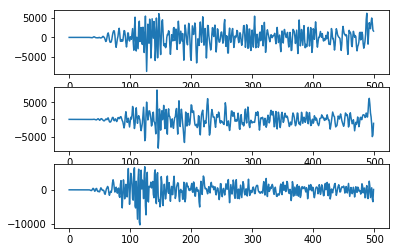

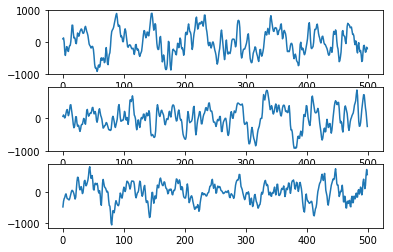

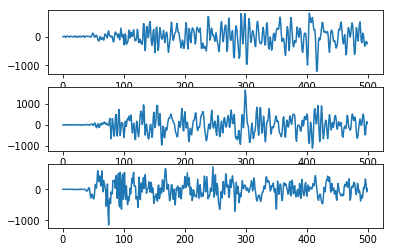

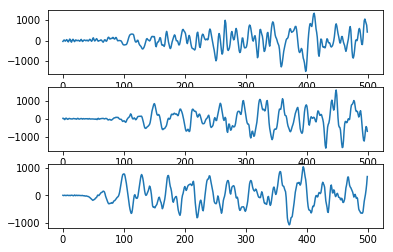

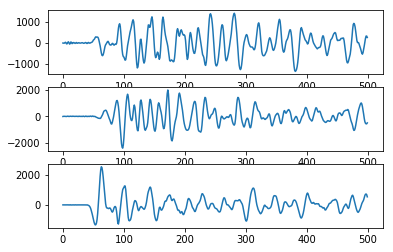

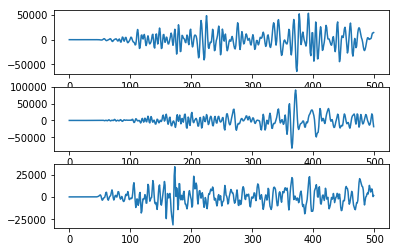

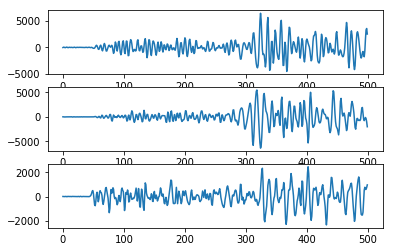

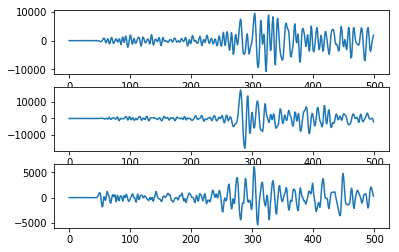

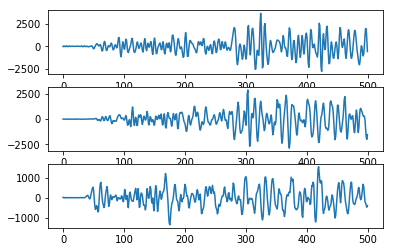

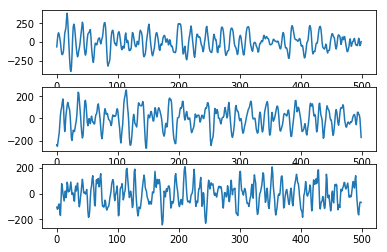

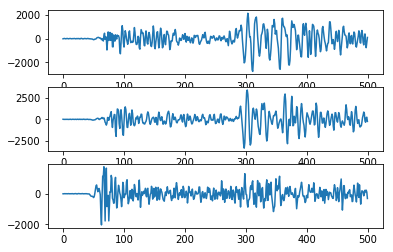

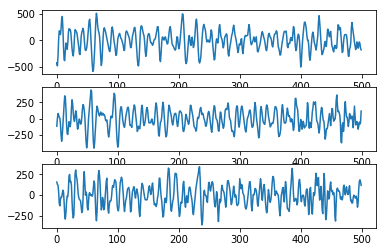

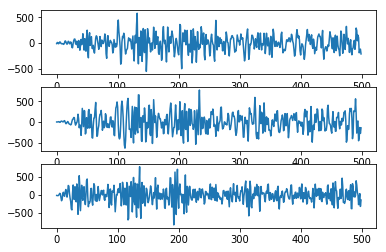

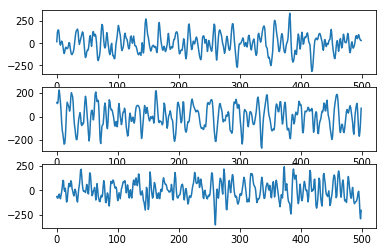

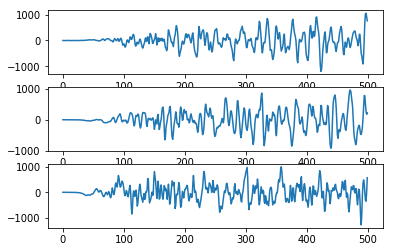

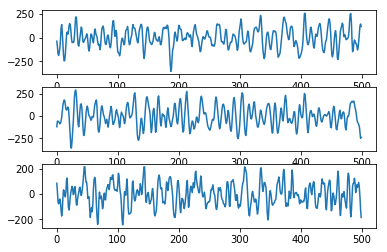

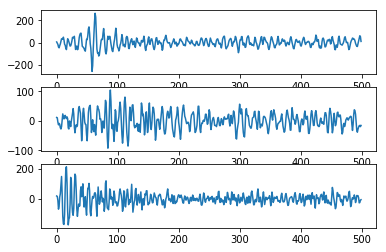

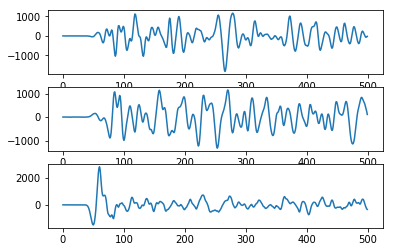

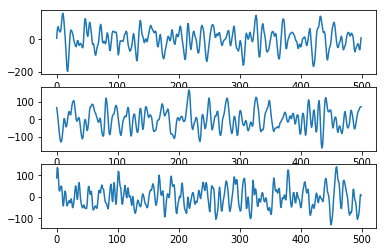

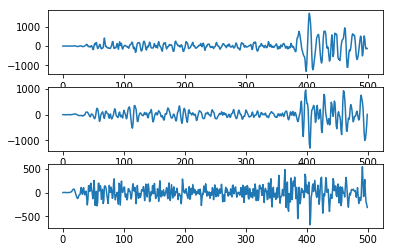

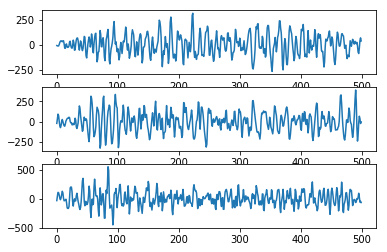

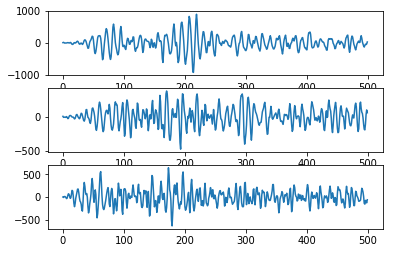

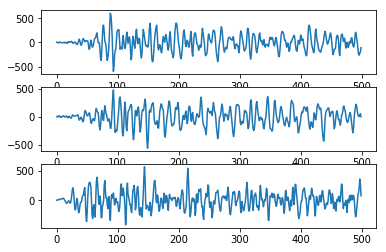

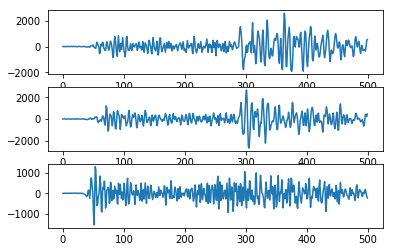

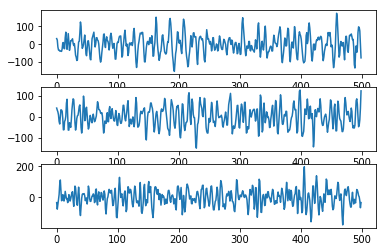

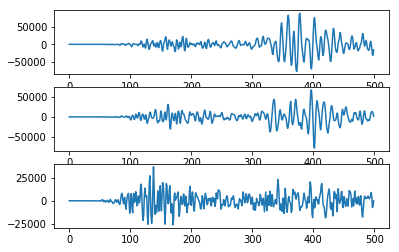

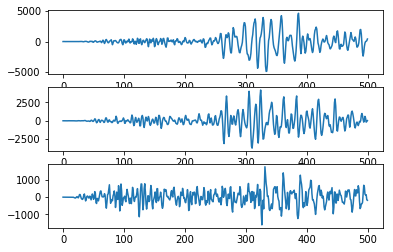

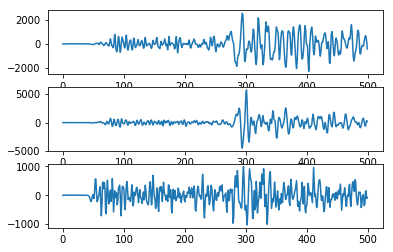

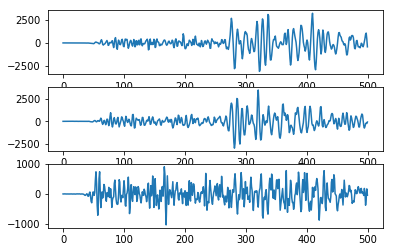

In [18]:
from obspy import read
import numpy as np
import random
import os
from p_time import *
import matplotlib.pyplot as plt

data = np.load('n_data.npy')
for i in range(350, 400):
    plt.figure(1)
    plt.subplot(311)
    plt.plot(data[i,0,:,0])
    plt.subplot(312)
    plt.plot(data[i,0,:,1])
    plt.subplot(313)
    plt.plot(data[i,0,:,2])
    plt.show()


    


In [ ]:
from obspy import read
import numpy as np
import random
import os
from p_time import *
import matplotlib.pyplot as plt
plt.figure(1)
plt.subplot(311)
sr = 'D:\ml_geophyscis\data\ABSH091702161432.EW2'
tempdata = read(sr)
print(tempdata)
plt.plot(tempdata[0].data)
plt.subplot(312)
sr = 'D:\ml_geophyscis\data\ABSH091702161432.NS2'
tempdata = read(sr)
print(tempdata)
plt.plot(tempdata[0].data)
plt.subplot(313)
sr = 'D:\ml_geophyscis\data\ABSH091702161432.UD2'
tempdata = read(sr)
print(tempdata)
plt.plot(tempdata[0].data)
plt.show()






In [ ]:
from obspy import read
import numpy as np
import random
import os
from p_time import *
import matplotlib.pyplot as plt

child = 'D:\ml_geophyscis\data\NGN0171708141811.EW'
st = read(str(child))
st[0].stats
data = st[0].data
data = data - data.mean()m
time_window = 100
Overlapping = 100
fft_data = []

for i in range (0,60):
    w = int(time_window/2)
    tran1 = np.abs(np.fft.fft(data[ i*Overlapping:i*Overlapping+time_window]))[:w]
    fft_data.append(tran1)
fft_data = np.array(fft_data)
plt.imshow(np.transpose(fft_data))
plt.show( )

In [ ]:
def sac_quad(data):
    quad_data = []
    lens = data.shape[0]
    for i in range(lens):
        quad_data.append(sum(data[:i+1]) *0.01)
    return np.array(quad_data)

def tao(sac_a_data, sac_v_data):
    mag = []
    v = sac_v_data[0]
    a = sac_a_data[0]
    alp = 0.999
    mag.append(2*np.sqrt(v/a)*3.14159)
    for i in range(1,sac_a_data.shape[0]):
        v = alp*v + sac_v_data[i]*sac_v_data[i]
        a = alp*a + sac_a_data[i]*sac_a_data[i]
        mag.append(2*np.sqrt(v/a)*3.14159)
    return mag

In [19]:
from obspy import read
import numpy as np
import random
import os
from p_time import *
import matplotlib.pyplot as plt

t_len = 300
def taoc(data, t_len, index=0):
    fft = np.abs(np.fft.fft(data[index:index+t_len]-data[index:index+t_len].mean()))
    fft = fft[:len(fft)/2]
    fft_ss_len = int(t_len/2-1)
    x = np.array(range(1,fft_ss_len+1))/fft_ss_len*100
    fft_ss = fft[1:]/x/x
    sum1 = sum(x*x*fft_ss*fft_ss)
    sum2 = sum(fft_ss*fft_ss)
    mag = np.log(1/np.sqrt(sum1/sum2))/np.log(10)*3.373 + 5.78
    return mag, fft_ss


In [24]:
data1 = np.load('n_data.npy')
data2 = np.load('n_data57.npy')
data = np.concatenate((data1, data2), axis=0)
label1 = np.load('n_magn.npy')
label2 = np.load('n_magn57.npy')
label = np.concatenate((label1, label2), axis=0)

f_threshold = np.where((label > 3.4)&(label < 5.8))
data = data[f_threshold[0]]
label = label[f_threshold[0]]
result = []

# q = taoc(data[1,:,:,0], t_len)
for i in range(len(label)):
    p1 = data[i,0,:,0]
    magn_t1, _  = taoc(p1, t_len)
    magn_t = magn_t1
    result.append(magn_t)

c:\users\bigsh\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  # This is added back by InteractiveShellApp.init_path()


In [25]:
np.abs(result-label).mean()

0.75628915903158067

In [ ]:
from obspy import read
import numpy as np
import random
import os
from p_time import *
import matplotlib.pyplot as plt

def taoc(data, t_len, index=200):
    fft = np.abs(np.fft.fft(data[index:index+t_len]-data[index:index+t_len].mean()))
    fft = fft[:len(fft)/2]
    fft_ss_len = int(t_len/2-1)
    x = np.array(range(1,fft_ss_len+1))/fft_ss_len*100
    fft_ss = fft[1:]/x/x
    sum1 = sum(x*x*fft_ss*fft_ss)
    sum2 = sum(fft_ss*fft_ss)
    mag = np.log(1/np.sqrt(sum1/sum2))/np.log(10)*3.373 + 5.78
    return mag, fft_ss

data = np.load('data.npy')
magn = np.load('magn.npy')
taoc_data = []
t_len = 300
for i in range(len(magn)):
    p1 = data[i,0,:,0]
    p2 = data[i,0,:,1]
    p3 = data[i,0,:,2]
    _, fft_ss1  = taoc(p1, t_len)
    _, fft_ss2  = taoc(p2, t_len)
    _, fft_ss3  = taoc(p3, t_len)
    t_len = 300
    fft_ss_len = int(t_len/2-1)
    x = np.array(range(1,fft_ss_len+1))/fft_ss_len*100
    taoc_data.append([fft_ss1, fft_ss2, fft_ss3])
taoc_data = np.transpose(taoc_data, [0, 2, 1])
print(taoc_data.shape)
np.save('taoc_data.npy', taoc_data)

In [ ]:
from obspy import read
import numpy as np
import random
import os
from p_time import *
import matplotlib.pyplot as plt

def taoc(data, t_len, index=0):
    fft = np.abs(np.fft.fft(data[index:index+t_len]-data[index:index+t_len].mean()))
    fft = fft[:len(fft)/2]
    fft_ss_len = int(t_len/2-1)
    x = np.array(range(1,fft_ss_len+1))/fft_ss_len*100
    fft_ss = fft[1:]/x/x
    sum1 = sum(x*x*fft_ss*fft_ss)
    sum2 = sum(fft_ss*fft_ss)
    mag = np.log(1/np.sqrt(sum1/sum2))/np.log(10)*3.373 + 5.78
    return mag, fft_ss

data = np.load('n_data57.npy')
magn = np.load('n_magn57.npy')
nn_taoc_data = []
t_len = 300
for i in range(len(magn)):
    p1 = data[i,0,:,0]
    p2 = data[i,0,:,1]
    p3 = data[i,0,:,2]
    _, fft_ss1  = taoc(p1, t_len)
    _, fft_ss2  = taoc(p2, t_len)
    _, fft_ss3  = taoc(p3, t_len)
    t_len = 300
    fft_ss_len = int(t_len/2-1)
    x = np.array(range(1,fft_ss_len+1))/fft_ss_len*100
    temp = np.array([fft_ss1])
    temp = temp.reshape(149)
    nn_taoc_data.append(temp)
nn_taoc_data = np.array(nn_taoc_data)
print(nn_taoc_data.shape)
np.save('n_nn_taoc_data57.npy', nn_taoc_data) 
np.save('w.npy', x) 

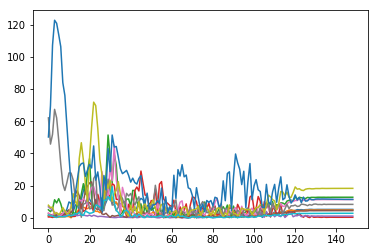

In [16]:
qqq= shock.train.inputs[np.where(p2 < 3.6)[0]]
for i in range(len(qqq)):
    plt.plot(qqq[i,:])


In [ ]:
w_index = np.where(y1<3.3)
r_index = np.where(y1>3.3)
plt.plot(y1[np.where(y1>3.3)], c='red', label='y')
plt.plot(p[np.where(y1>3.3)], c='black', label='prediction_y')
plt.ylabel(' magnitude')
plt.legend()

In [ ]:
plt.plot(y1[np.where(y1<3.3)], c='red', label='y')
plt.plot(p[np.where(y1<3.3)], c='black', label='prediction_y')
plt.ylabel(' magnitude')
plt.legend()

In [ ]:
plt.plot(y1, c='red', label='y')
plt.plot(p, c='black', label='prediction_y')
plt.ylabel(' magnitude')
plt.legend()

In [ ]:
sac = np.load('data.npy')
nn_taoc_data = np.load('nn_taoc_data.npy')
w = np.load('w.npy')

In [ ]:
for i in range(30,50):
    plt.figure(1)
    plt.subplot(221)
    plt.plot(sac[w_index[0][i],0,:,0])
    plt.subplot(222)
    plt.plot(sac[r_index[0][i],0,:,0])
    plt.show()

In [ ]:
np.abs(y1[w_index]-p[w_index]).mean()

In [ ]:
for i in range(70, 100):
    plt.figure(1)
    plt.subplot(221)
    plt.plot(nn_taoc_data[w_index[0][i],:]*w)
    plt.subplot(222)
    plt.plot(nn_taoc_data[r_index[0][i],:]*w)
    plt.show()

In [ ]:
import pandas as pd
import lightgbm as lgb
import  sklearn
import numpy as np
import matplotlib.pyplot as plt;plt.rcdefaults()
import matplotlib.pyplot as plt
import random

input_vec_size = lstm_size = 10  # 输入向量的维度
time_step_size = 149  # 循环层长度

train_size = 15000
batch_size = 50
data = np.load('nn_taoc_data.npy')
label = np.load('magn.npy')
w = np.load('w.npy')
label = label.reshape(len(label), 1)
dis = np.load('dis.npy')

#标准化
for i in range(len(data)):
    data[i, :] = data[i, :]*w
for i in range(149):
    data[:,i] = (data[:,i]-data[:,i].mean())/data[:,i].std()

In [ ]:
data_len = len(data)
index = np.array(range(data_len))
random.shuffle(index)
data_batch_loc = index[ : int((data_len+1)*0.7)]
ret = index[int((data_len+1)*0.7) :]
c = [str(i) for i in range(149)]

In [ ]:
label1 = np.load('n_magn.npy')
label2 = np.load('n_magn57.npy')
label = np.concatenate((label1, label2), axis=0)
plt.hist(label,bins=25)
plt.show()

In [ ]:
small_threshold = np.where(label < 3.4)
big_threshold = np.where(label > 5.8)
f_threshold = np.where((label > 3.4)&(label < 5.8))

In [ ]:
len(f_threshold[0])

In [ ]:
plt.hist(label[f_threshold[0]],bins=20)